In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../Datasets/Used Car Data/vehicles.csv")
df.head()

id                                                url      region  \
0  7088746062  https://greensboro.craigslist.org/ctd/d/cary-2...  greensboro   
1  7088745301  https://greensboro.craigslist.org/ctd/d/bmw-3-...  greensboro   
2  7088744126  https://greensboro.craigslist.org/cto/d/greens...  greensboro   
3  7088743681  https://greensboro.craigslist.org/ctd/d/cary-2...  greensboro   
4  7074612539  https://lincoln.craigslist.org/ctd/d/gretna-20...     lincoln   

                          region_url  price    year manufacturer  \
0  https://greensboro.craigslist.org  10299  2012.0        acura   
1  https://greensboro.craigslist.org      0  2011.0          bmw   
2  https://greensboro.craigslist.org   9500  2011.0       jaguar   
3  https://greensboro.craigslist.org   3995  2004.0        honda   
4     https://lincoln.craigslist.org  41988  2016.0    chevrolet   

               model  condition    cylinders  ... drive  size         type  \
0                 tl        NaN          NaN  ...   NaN   NaN        other   
1                335        NaN  6 cylinders  ...   rwd   NaN  convertible   
2                 xf  excellent          NaN  ...   NaN   NaN          NaN   
3            element        NaN          NaN  ...   fwd   NaN          SUV   
4  silverado k2500hd        NaN          NaN  ...   NaN   NaN          NaN   

  paint_color                                          image_url  \
0        blue  https://images.craigslist.org/01414_3LIXs9EO33...   
1        blue  https://images.craigslist.org/00S0S_1kTatLGLxB...   
2        blue  https://images.craigslist.org/00505_f22HGItCRp...   
3      orange  https://images.craigslist.org/00E0E_eAUnhFF86M...   
4         NaN  https://images.craigslist.org/00S0S_8msT7RQquO...   

                                         description county state      lat  \
0  2012 Acura TL Base 4dr Sedan     Offered by: B...    NaN    nc  35.7636   
1  BMW 3 Series 335i Convertible Navigation Dakot...    NaN    nc      NaN   
2  2011 jaguar XF premium - estate sale. Retired ...    NaN    nc  36.1032   
3  2004 Honda Element LX 4dr SUV     Offered by: ...    NaN    nc  35.7636   
4  Shop Indoors, Heated Showroom!!!www.gretnaauto...    NaN    ne  41.1345   

      long  
0 -78.7443  
1      NaN  
2 -79.8794  
3 -78.7443  
4 -96.2458  

[5 rows x 25 columns]

# Data Exploration

In [3]:
# Checking number of rows and columns in the dataframe
print(f'Dataframe contains {df.shape[0]} rows and {df.shape[1]} columns.')

Dataframe contains 539759 rows and 25 columns.


In [4]:
# Checking type of columns in the dataframe
print(df.dtypes)

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
vin              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
dtype: object


In [5]:
# From the df.head() above, we notice that there are some missing columns, we need to check the percentage of missing value first before proceeding with analysis.

(df.isnull().sum()/df.shape[0])*100

id                0.000000
url               0.000000
region            0.000000
region_url        0.000000
price             0.000000
year              0.182859
manufacturer      4.369357
model             1.484551
condition        43.732851
cylinders        40.480103
fuel              0.628614
odometer         18.337073
title_status      0.544688
transmission      0.736069
vin              41.575963
drive            28.859547
size             68.773101
type             27.321267
paint_color      32.280888
image_url         0.003520
description       0.003891
county          100.000000
state             0.000000
lat               1.662594
long              1.662594
dtype: float64

In [6]:
# Because there are some high percentage value of missing data, let's set a threshold of 60% missing data. Any column with value higher than that will be dropped.
# We can also drop unrelated and unnecessary columns that won't be useful for analysis or predictions.

dfCars = df.drop(labels=['id','url','region_url','model','vin','size','image_url','description','county'],axis=1)
dfCars.head(10)

region  price    year manufacturer  condition    cylinders fuel  \
0  greensboro  10299  2012.0        acura        NaN          NaN  gas   
1  greensboro      0  2011.0          bmw        NaN  6 cylinders  gas   
2  greensboro   9500  2011.0       jaguar  excellent          NaN  gas   
3  greensboro   3995  2004.0        honda        NaN          NaN  gas   
4     lincoln  41988  2016.0    chevrolet        NaN          NaN  gas   
5  greensboro  12995  2015.0          kia        NaN          NaN  gas   
6  greensboro  10995  2014.0    chevrolet        NaN          NaN  gas   
7  greensboro   8995  2011.0          bmw        NaN          NaN  gas   
8  greensboro   3995  2007.0       toyota        NaN          NaN  gas   
9  greensboro   8995  2005.0       toyota        NaN          NaN  gas   

   odometer title_status transmission drive         type paint_color state  \
0   90186.0        clean    automatic   NaN        other        blue    nc   
1  115120.0        clean    automatic   rwd  convertible        blue    nc   
2   85000.0        clean    automatic   NaN          NaN        blue    nc   
3  212526.0        clean    automatic   fwd          SUV      orange    nc   
4       NaN        clean    automatic   NaN          NaN         NaN    ne   
5   85127.0        clean    automatic   4wd        wagon         NaN    nc   
6  112383.0        clean    automatic   fwd          SUV       black    nc   
7  124446.0        clean    automatic   NaN        sedan      silver    nc   
8  185123.0        clean    automatic   fwd  convertible       black    nc   
9  181020.0        clean    automatic   NaN        other       black    nc   

       lat     long  
0  35.7636 -78.7443  
1      NaN      NaN  
2  36.1032 -79.8794  
3  35.7636 -78.7443  
4  41.1345 -96.2458  
5  35.7636 -78.7443  
6  35.7636 -78.7443  
7  35.7636 -78.7443  
8  35.7636 -78.7443  
9  35.7636 -78.7443

In [7]:
# Dealing with missing value
# Because we don't have the knowledge to fill in missing values without affecting predictions, let's just drop it to avoid bias and mispredictions
dfCars.dropna(inplace=True)
dfCars.head(10)

region  price    year manufacturer  condition    cylinders fuel  \
13        denver   7995  2010.0    chevrolet  excellent  8 cylinders  gas   
25      syracuse   4000  1995.0        dodge  excellent  8 cylinders  gas   
28    greensboro  16000  2011.0          bmw  excellent  6 cylinders  gas   
29      syracuse  10950  2011.0        buick  excellent  6 cylinders  gas   
31      syracuse   9400  2011.0          bmw       good  6 cylinders  gas   
35      syracuse   4500  2012.0         ford  excellent  6 cylinders  gas   
40  south jersey   1495  2004.0      hyundai       good  6 cylinders  gas   
42      richmond   2800  2002.0       nissan   like new  6 cylinders  gas   
48  south jersey  25900  2008.0         ford  excellent  8 cylinders  gas   
62    greensboro   4999  2007.0     infiniti       good  6 cylinders  gas   

    odometer title_status transmission drive   type paint_color state  \
13  194050.0        clean    automatic   4wd  truck       white    co   
25  133000.0        clean    automatic   4wd  truck        grey    ny   
28   85000.0      salvage    automatic   fwd  sedan        grey    nc   
29   43418.0        clean    automatic   fwd  sedan         red    ny   
31  145000.0        clean    automatic   4wd    SUV        blue    ny   
35  155000.0        clean    automatic   4wd  sedan      silver    ny   
40  196123.0        clean    automatic   4wd    SUV         red    nj   
42  190000.0        clean    automatic   4wd    SUV      silver    va   
48   73000.0        clean    automatic   rwd  truck       white    nj   
62  113772.0        clean    automatic   rwd  sedan      custom    nc   

        lat      long  
13  39.8302 -105.0370  
25  43.0734  -76.1568  
28  35.5895  -82.5671  
29  43.1226  -76.1284  
31  43.1707  -76.0962  
35  43.4427  -76.5108  
40  39.7054  -75.1080  
42  37.7202  -77.0998  
48  39.7776  -75.0510  
62  36.0220  -79.7821

In [8]:
# Check price column for 'unusual' value
# Price under 100 will be categorized as unusual because it's too cheap for a car
dfCars[dfCars['price'] < 101]

region  price    year manufacturer  condition  \
221                   rockford      0  2011.0       nissan  excellent   
334                  nashville      0  2014.0         ford  excellent   
597                  nashville      0  2014.0       nissan  excellent   
613                  nashville      0  2010.0         ford  excellent   
623                  nashville      0  2013.0       toyota  excellent   
...                        ...    ...     ...          ...        ...   
538380  waterloo / cedar falls      0  2012.0          gmc       good   
538466  omaha / council bluffs      0  2017.0          ram  excellent   
538579      quad cities, IA/IL      0  2011.0        honda  excellent   
538777           western slope      0  1981.0          gmc       good   
539681              greensboro      0  2011.0          ram       good   

          cylinders    fuel  odometer title_status transmission drive   type  \
221     6 cylinders     gas  179980.0        clean    automatic   4wd    SUV   
334     6 cylinders     gas   60000.0      rebuilt    automatic   4wd  truck   
597     4 cylinders     gas   49000.0      rebuilt    automatic   fwd  sedan   
613     8 cylinders     gas  125404.0      rebuilt    automatic   4wd  truck   
623     6 cylinders     gas  102392.0        clean    automatic   fwd    SUV   
...             ...     ...       ...          ...          ...   ...    ...   
538380  8 cylinders     gas       1.0        clean    automatic   4wd  truck   
538466  8 cylinders     gas   24986.0        clean    automatic   4wd  truck   
538579  4 cylinders     gas  116000.0        clean    automatic   fwd  sedan   
538777  8 cylinders  diesel   77570.0        clean       manual   rwd  truck   
539681  8 cylinders     gas   35404.0        clean    automatic   rwd  truck   

       paint_color state      lat      long  
221            red    il  42.3204  -88.9827  
334         custom    tn  36.1036  -86.7418  
597           grey    tn  36.1036  -86.7417  
613            red    tn  36.1040  -86.7417  
623          brown    tn  36.1034  -86.7417  
...            ...   ...      ...       ...  
538380       white    ia  41.5638  -90.6338  
538466         red    ia  41.2256  -95.8595  
538579        grey    il  41.4884  -90.4710  
538777       white    co  39.2279 -108.8150  
539681       black    nc  33.7115  -78.9096  

[7412 rows x 16 columns]

In [9]:
# Let's drop the 'unusual' price
dfCars.drop(dfCars[dfCars['price'] < 101].index, inplace=True)
dfCars[dfCars['price'] < 101]

Empty DataFrame
Columns: [region, price, year, manufacturer, condition, cylinders, fuel, odometer, title_status, transmission, drive, type, paint_color, state, lat, long]
Index: []

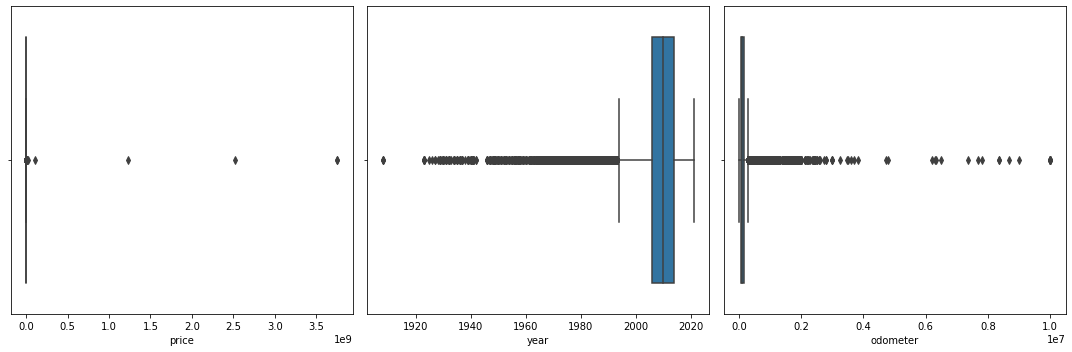

In [10]:
# Checking outlier using boxplot
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.boxplot(dfCars['price'], ax=ax[0])
sns.boxplot(dfCars['year'], ax=ax[1])
sns.boxplot(dfCars['odometer'], ax=ax[2])
plt.tight_layout()

In [11]:
# Checking outliers for price using IQR method
iqrPrice = dfCars['price'].describe()['75%'] - dfCars['price'].describe()['25%']
lowerboundPrice = dfCars['price'].describe()['25%'] - (1.5 * iqrPrice)
upperboundPrice = dfCars['price'].describe()['75%'] + (1.5 * iqrPrice)

dfCars[(dfCars['price'] < lowerboundPrice) | (dfCars['price'] > upperboundPrice)]

region  price    year   manufacturer  condition  \
90           western slope  82000  1997.0          rover  excellent   
218             greensboro  38200  2016.0       cadillac       good   
292              nashville  34900  2013.0  mercedes-benz  excellent   
330             greensboro  37000  2017.0            gmc       good   
790      utica-rome-oneida  36500  2019.0         toyota   like new   
...                    ...    ...     ...            ...        ...   
538688  quad cities, IA/IL  54000  2015.0            ram  excellent   
538836   northern michigan  35500  2015.0            gmc       good   
538842       western slope  45995  2015.0            gmc  excellent   
538843       western slope  38995  2014.0            ram  excellent   
539268        fayetteville  37000  2017.0            gmc       good   

          cylinders    fuel  odometer title_status transmission drive    type  \
90      8 cylinders     gas   54000.0        clean    automatic   4wd     SUV   
218     6 cylinders     gas   27976.0        clean    automatic   4wd   sedan   
292     6 cylinders  diesel   23893.0        clean    automatic   rwd     van   
330     8 cylinders     gas   25053.0        clean    automatic   4wd  pickup   
790     6 cylinders     gas    3600.0         lien    automatic   4wd     SUV   
...             ...     ...       ...          ...          ...   ...     ...   
538688  8 cylinders  diesel   57000.0         lien    automatic   4wd   truck   
538836  8 cylinders  diesel  106973.0        clean    automatic   4wd   truck   
538842  8 cylinders  diesel  102689.0        clean    automatic   4wd   truck   
538843  6 cylinders  diesel  111623.0        clean    automatic   4wd   truck   
539268  8 cylinders     gas   25053.0        clean    automatic   4wd  pickup   

       paint_color state      lat      long  
90           green    co  37.9400 -107.8210  
218          white    nc  36.1038  -78.2924  
292          black    tn  30.9533  -95.9091  
330           grey    nc  36.0700  -79.8200  
790           grey    ny  42.5295  -75.3852  
...            ...   ...      ...       ...  
538688       white    il  41.5386  -90.6115  
538836       black    mi  43.0506  -83.6151  
538842       black    co  39.7085 -105.0250  
538843       white    co  39.7085 -105.0250  
539268        grey    nc  33.7865  -84.4454  

[4916 rows x 16 columns]

In [12]:
# Checking outliers for year using IQR method
iqrYear = dfCars['year'].describe()['75%'] - dfCars['year'].describe()['25%']
lowerboundYear = dfCars['year'].describe()['25%'] - (1.5 * iqrYear)
upperboundYear = dfCars['year'].describe()['75%'] + (1.5 * iqrYear)

dfCars[(dfCars['year'] < lowerboundYear) | (dfCars['year'] > upperboundYear)]

region  price    year manufacturer  condition  \
528             greensboro  30000  1966.0         ford  excellent   
680              nashville  12500  1987.0      pontiac  excellent   
1640             pensacola   2000  1993.0         ford       good   
1860            greensboro   6495  1993.0         ford       good   
1906              rockford   3500  1992.0       subaru       good   
...                    ...    ...     ...          ...        ...   
539075       western slope   1495  1982.0         ford       fair   
539148  quad cities, IA/IL  15000  1967.0         ford  excellent   
539207        south jersey   5995  1988.0   volkswagen       good   
539244        fayetteville   5000  1972.0   volkswagen       good   
539673          greensboro  12500  1989.0   volkswagen       good   

          cylinders fuel  odometer title_status transmission drive  \
528     8 cylinders  gas   51000.0        clean       manual   rwd   
680     8 cylinders  gas   42000.0        clean    automatic   rwd   
1640    8 cylinders  gas  258225.0        clean    automatic   rwd   
1860    8 cylinders  gas  116260.0        clean    automatic   rwd   
1906    6 cylinders  gas  166106.0        clean    automatic   4wd   
...             ...  ...       ...          ...          ...   ...   
539075  6 cylinders  gas   15804.0        clean       manual   4wd   
539148  8 cylinders  gas  150000.0        clean    automatic   rwd   
539207  4 cylinders  gas   81571.0        clean    automatic   rwd   
539244  4 cylinders  gas  111111.0        clean       manual   rwd   
539673  4 cylinders  gas  262450.0        clean    automatic   rwd   

               type paint_color state      lat      long  
528     convertible         red    nc  35.6122  -79.8236  
680     convertible       black    tn  35.2863  -87.8471  
1640          truck         red    fl  30.4129  -87.3092  
1860          truck         red    nc  36.0708  -79.4052  
1906      hatchback       green    il  42.2657  -89.0049  
...             ...         ...   ...      ...       ...  
539075        truck       white    co  38.7613 -108.1170  
539148        coupe       green    il  41.4906  -90.4980  
539207     mini-van       white    nj  39.6344  -74.8052  
539244        coupe      orange    nc  35.0583  -79.0080  
539673     mini-van        blue    nc  36.1165  -80.0831  

[3939 rows x 16 columns]

In [13]:
# Checking outliers for odometer using IQR method
iqrOdo = dfCars['odometer'].describe()['75%'] - dfCars['odometer'].describe()['25%']
lowerboundOdo = dfCars['odometer'].describe()['25%'] - (1.5 * iqrOdo)
upperboundOdo = dfCars['odometer'].describe()['75%'] + (1.5 * iqrOdo)

dfCars[(dfCars['odometer'] < lowerboundOdo) | (dfCars['odometer'] > upperboundOdo)]

region  price    year manufacturer  condition  \
214     omaha / council bluffs   3890  2011.0       subaru  excellent   
336                 greensboro   2500  2009.0    chevrolet       fair   
845               south jersey   4000  2010.0          gmc       fair   
1636    omaha / council bluffs   9999  2017.0    chevrolet   like new   
2248          hickory / lenoir   8995  2011.0    chevrolet       good   
...                        ...    ...     ...          ...        ...   
538834           western slope   3500  1998.0       toyota       good   
538939            south jersey   5900  1999.0        lexus  excellent   
539101                richmond    500  1996.0       nissan    salvage   
539274                richmond    600  1998.0         jeep       good   
539612              greensboro    800  1998.0        honda       fair   

          cylinders fuel   odometer title_status transmission drive    type  \
214     4 cylinders  gas   300000.0        clean    automatic   4wd     SUV   
336     8 cylinders  gas   300000.0        clean    automatic   rwd     van   
845     8 cylinders  gas   340000.0        clean    automatic   rwd  pickup   
1636    4 cylinders  gas   323132.0        clean    automatic   fwd   sedan   
2248    8 cylinders  gas   336720.0        clean    automatic   4wd     SUV   
...             ...  ...        ...          ...          ...   ...     ...   
538834  6 cylinders  gas   279000.0        clean    automatic   4wd     SUV   
538939  8 cylinders  gas   314501.0        clean    automatic   4wd     SUV   
539101  4 cylinders  gas   330000.0      missing       manual   rwd  pickup   
539274  8 cylinders  gas  2380567.0        clean    automatic   4wd     SUV   
539612  4 cylinders  gas   319670.0        clean    automatic   fwd   coupe   

       paint_color state      lat      long  
214          white    ia  41.2962  -95.9650  
336          white    nc  36.0036  -80.0036  
845          white    nj  39.7503  -74.9125  
1636         white    ia  41.1497  -95.9099  
2248         brown    nc  35.8066  -81.4287  
...            ...   ...      ...       ...  
538834       brown    co  39.2511 -107.2040  
538939       brown    nj  39.8845  -74.9067  
539101       green    va  36.9188  -77.4189  
539274       brown    va  37.6691  -77.3294  
539612       white    nc  36.1673  -79.9804  

[1740 rows x 16 columns]

In [14]:
# Dropping outliers using lowerbound and upperbound price threshold
dfCars.drop(dfCars[dfCars['price'] > upperboundPrice].index, inplace=True)
dfCars.drop(dfCars[dfCars['price'] < lowerboundPrice].index, inplace=True)

# Dropping outliers using lowerbound and upperbound year threshold
dfCars.drop(dfCars[dfCars['year'] > upperboundYear].index, inplace=True)
dfCars.drop(dfCars[dfCars['year'] < lowerboundYear].index, inplace=True)

# Dropping outliers using lowerbound and upperbound odometer threshold
dfCars.drop(dfCars[dfCars['odometer'] > upperboundOdo].index, inplace=True)
dfCars.drop(dfCars[dfCars['odometer'] < lowerboundOdo].index, inplace=True)
dfCars.head()

region  price    year manufacturer  condition    cylinders fuel  \
13      denver   7995  2010.0    chevrolet  excellent  8 cylinders  gas   
25    syracuse   4000  1995.0        dodge  excellent  8 cylinders  gas   
28  greensboro  16000  2011.0          bmw  excellent  6 cylinders  gas   
29    syracuse  10950  2011.0        buick  excellent  6 cylinders  gas   
31    syracuse   9400  2011.0          bmw       good  6 cylinders  gas   

    odometer title_status transmission drive   type paint_color state  \
13  194050.0        clean    automatic   4wd  truck       white    co   
25  133000.0        clean    automatic   4wd  truck        grey    ny   
28   85000.0      salvage    automatic   fwd  sedan        grey    nc   
29   43418.0        clean    automatic   fwd  sedan         red    ny   
31  145000.0        clean    automatic   4wd    SUV        blue    ny   

        lat      long  
13  39.8302 -105.0370  
25  43.0734  -76.1568  
28  35.5895  -82.5671  
29  43.1226  -76.1284  
31  43.1707  -76.0962

In [16]:
dfCars

region  price    year manufacturer  condition    cylinders  \
13             denver   7995  2010.0    chevrolet  excellent  8 cylinders   
25           syracuse   4000  1995.0        dodge  excellent  8 cylinders   
28         greensboro  16000  2011.0          bmw  excellent  6 cylinders   
29           syracuse  10950  2011.0        buick  excellent  6 cylinders   
31           syracuse   9400  2011.0          bmw       good  6 cylinders   
...               ...    ...     ...          ...        ...          ...   
539732  western slope   9457  2008.0      lincoln       good  8 cylinders   
539733       richmond   1000  1998.0         ford       fair  8 cylinders   
539735  western slope   7455  2013.0       toyota       good  4 cylinders   
539744       syracuse   6300  2014.0       nissan       good  4 cylinders   
539752         denver   5295  2006.0         audi  excellent  4 cylinders   

       fuel  odometer title_status transmission drive    type paint_color  \
13      gas  194050.0        clean    automatic   4wd   truck       white   
25      gas  133000.0        clean    automatic   4wd   truck        grey   
28      gas   85000.0      salvage    automatic   fwd   sedan        grey   
29      gas   43418.0        clean    automatic   fwd   sedan         red   
31      gas  145000.0        clean    automatic   4wd     SUV        blue   
...     ...       ...          ...          ...   ...     ...         ...   
539732  gas  192108.0        clean    automatic   4wd     SUV       white   
539733  gas  204374.0        clean    automatic   4wd  pickup         red   
539735  gas  139573.0        clean    automatic   fwd   sedan       black   
539744  gas   85000.0        clean    automatic   fwd   sedan        grey   
539752  gas  150000.0        clean    automatic   4wd   wagon      custom   

       state      lat      long  
13        co  39.8302 -105.0370  
25        ny  43.0734  -76.1568  
28        nc  35.5895  -82.5671  
29        ny  43.1226  -76.1284  
31        ny  43.1707  -76.0962  
...      ...      ...       ...  
539732    co  38.4965 -107.8970  
539733    va  37.9442  -77.5818  
539735    co  38.4965 -107.8970  
539744    ny  43.1099  -76.1870  
539752    co  39.6575 -104.7850  

[128298 rows x 16 columns]

# Data Visualization

In [15]:
sns.set_style('darkgrid')
sns.set_context(context='talk', font_scale=0.8)

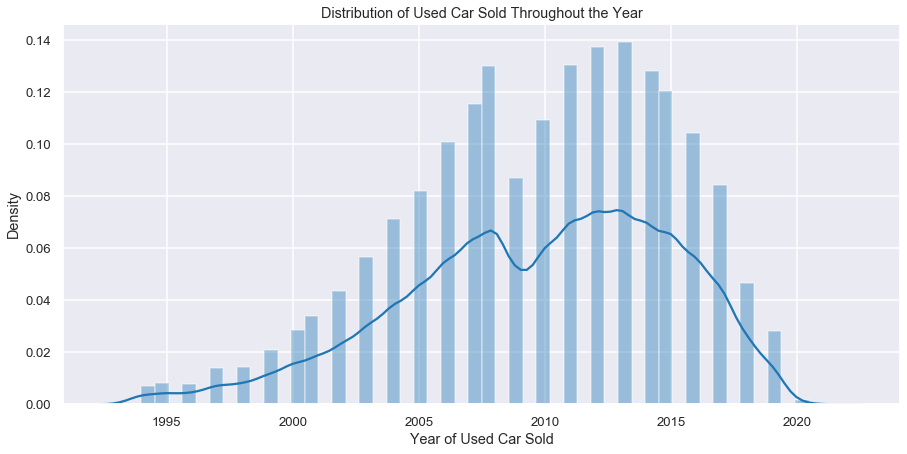

In [73]:
plt.figure(figsize=(15,7))
sns.distplot(dfCars['year'])
plt.xlabel('Year of Used Car Sold')
plt.ylabel('Density')
plt.title('Distribution of Used Car Sold Throughout the Year')
plt.show()

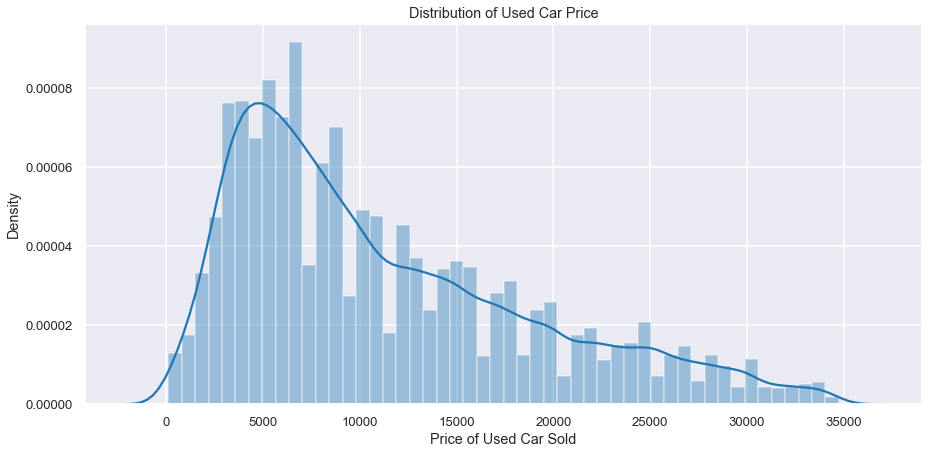

In [17]:
plt.figure(figsize=(15,7))
sns.distplot(dfCars['price'])
plt.xlabel('Price of Used Car Sold')
plt.ylabel('Density')
plt.title('Distribution of Used Car Price')
plt.show()

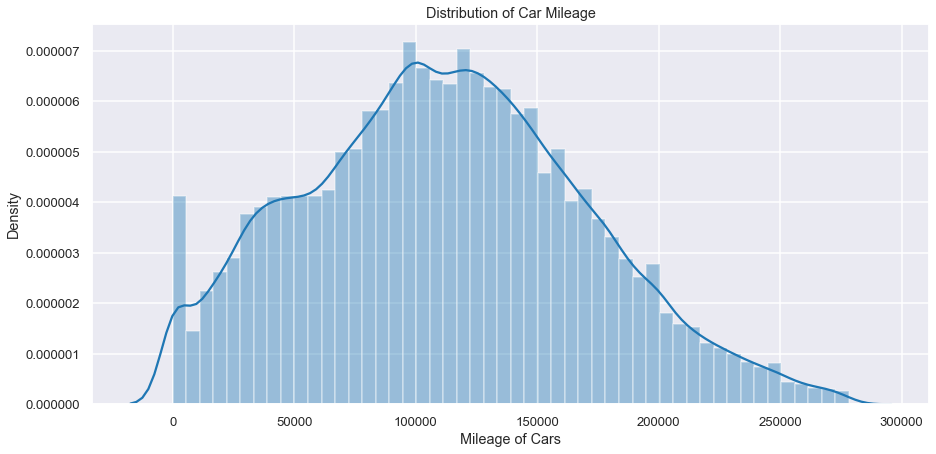

In [18]:
plt.figure(figsize=(15,7))
sns.distplot(dfCars['odometer'])
plt.xlabel('Mileage of Cars')
plt.ylabel('Density')
plt.title('Distribution of Car Mileage')
plt.show()

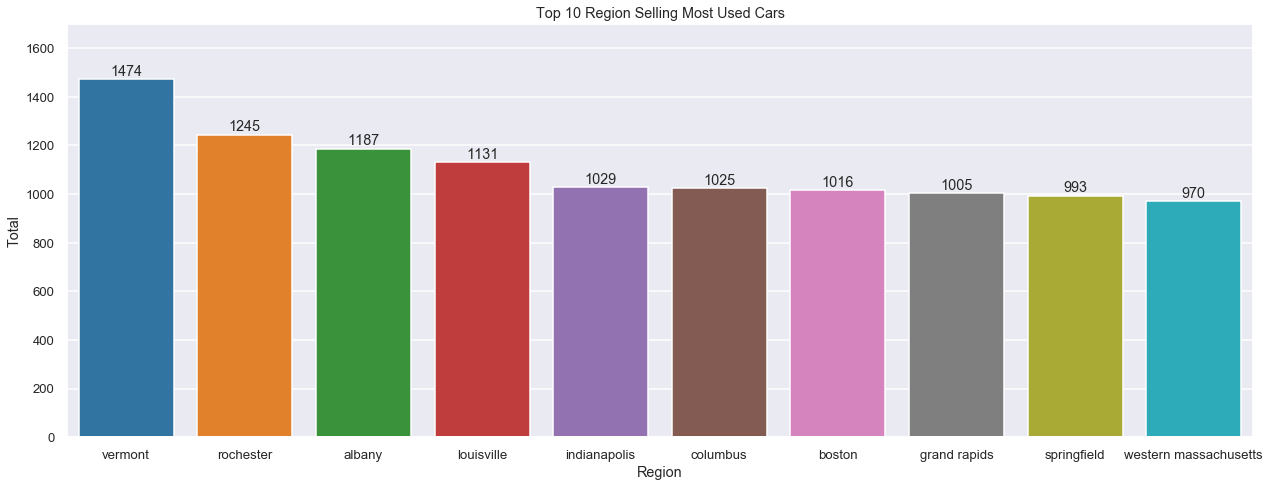

In [19]:
# Top 10 region that sell most used cars
x = dfCars['region'].value_counts().nlargest(10).index
y = dfCars['region'].value_counts().nlargest(10).values
plt.figure(figsize=(18,7))
ax = sns.barplot(x=x, y=y)
for p in ax.patches:
    val = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            val+15,
            int(val),
            ha="center") 
plt.xlabel('Region')
plt.ylabel('Total')
plt.title('Top 10 Region Selling Most Used Cars')
plt.ylim(0,1700)
plt.tight_layout()
plt.show()

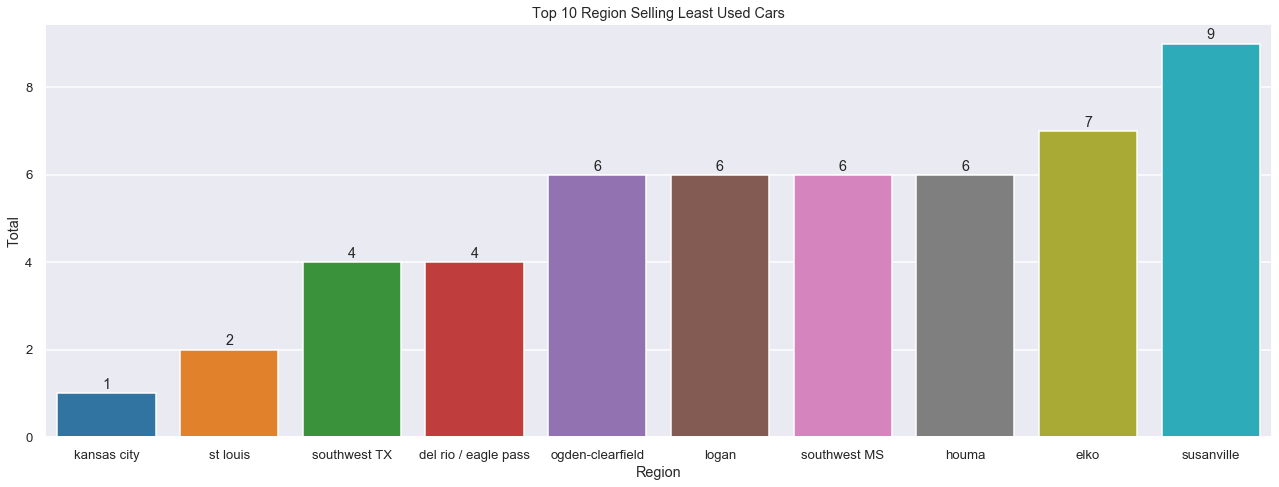

In [20]:
# Top 10 region that sell least used cars
x = dfCars['region'].value_counts().nsmallest(10).index
y = dfCars['region'].value_counts().nsmallest(10).values
plt.figure(figsize=(18,7))
ax = sns.barplot(x=x, y=y)
for p in ax.patches:
    val = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            val+.1,
            int(val),
            ha="center") 
plt.xlabel('Region')
plt.ylabel('Total')
plt.title('Top 10 Region Selling Least Used Cars')
plt.tight_layout()
plt.show()

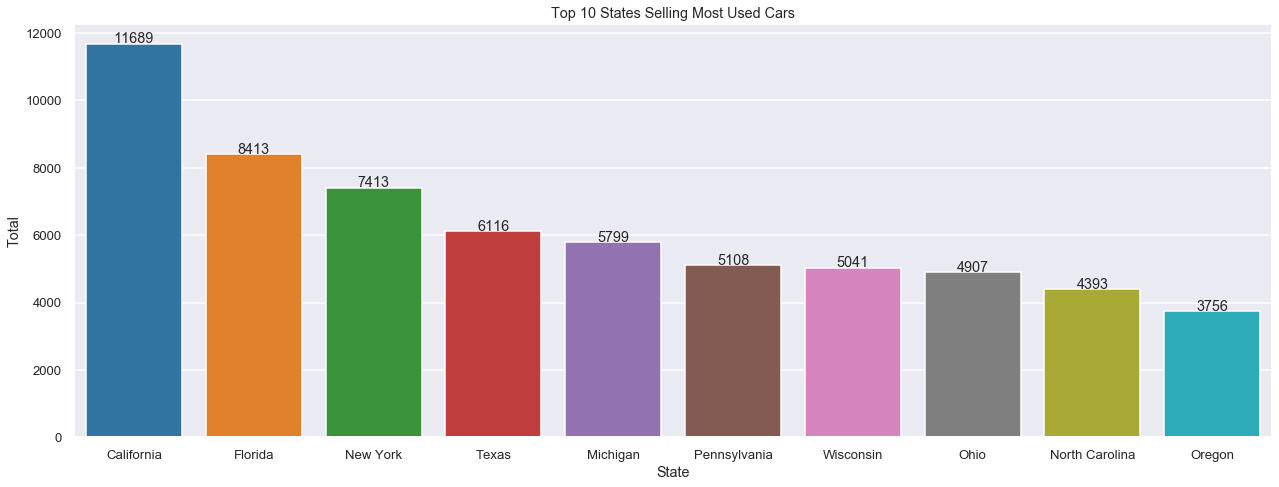

In [21]:
# Top 10 state that sell most used cars
x = dfCars['state'].value_counts().nlargest(10).index
y = dfCars['state'].value_counts().nlargest(10).values
plt.figure(figsize=(18,7))
ax = sns.barplot(x=x, y=y)
for p in ax.patches:
    val = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            val+15,
            int(val),
            ha="center") 
plt.xlabel('State')
plt.ylabel('Total')
plt.title('Top 10 States Selling Most Used Cars')
states = ['California', 'Florida', 'New York', 'Texas', 'Michigan', 'Pennsylvania', 'Wisconsin', 'Ohio', 'North Carolina', 'Oregon']
plt.xticks([i for i in range(10)],states)
plt.tight_layout()
plt.show()

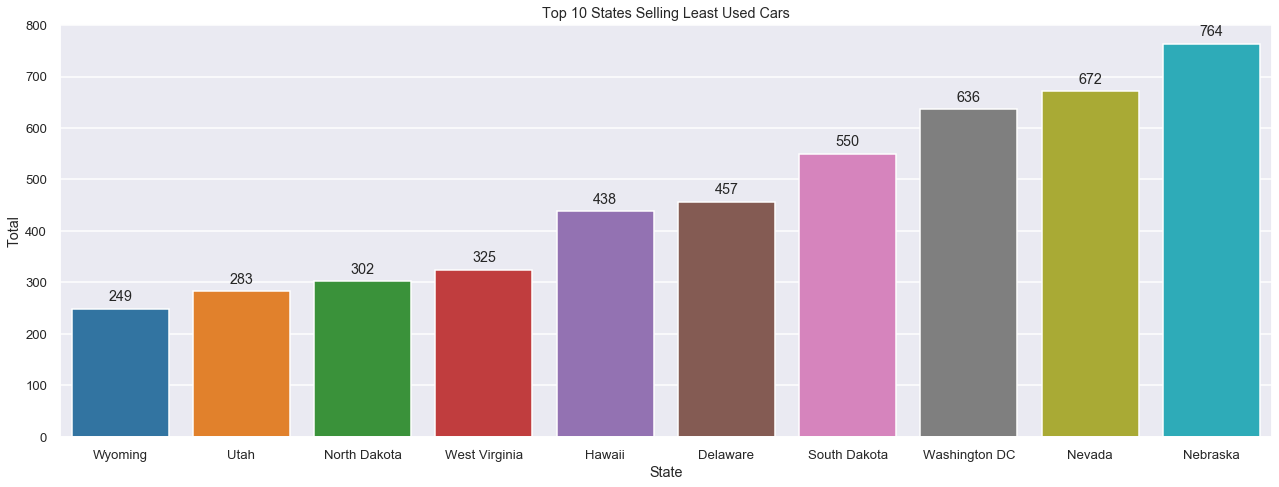

In [22]:
# Top 10 state that sell most used cars
x = dfCars['state'].value_counts().nsmallest(10).index
y = dfCars['state'].value_counts().nsmallest(10).values
plt.figure(figsize=(18,7))
ax = sns.barplot(x=x, y=y)
for p in ax.patches:
    val = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            val+15,
            int(val),
            ha="center") 
plt.xlabel('State')
plt.ylabel('Total')
plt.title('Top 10 States Selling Least Used Cars')
states = ['Wyoming', 'Utah', 'North Dakota', 'West Virginia', 'Hawaii', 'Delaware', 'South Dakota', 'Washington DC', 'Nevada', 'Nebraska']
plt.xticks([i for i in range(10)],states)
plt.tight_layout()
plt.show()

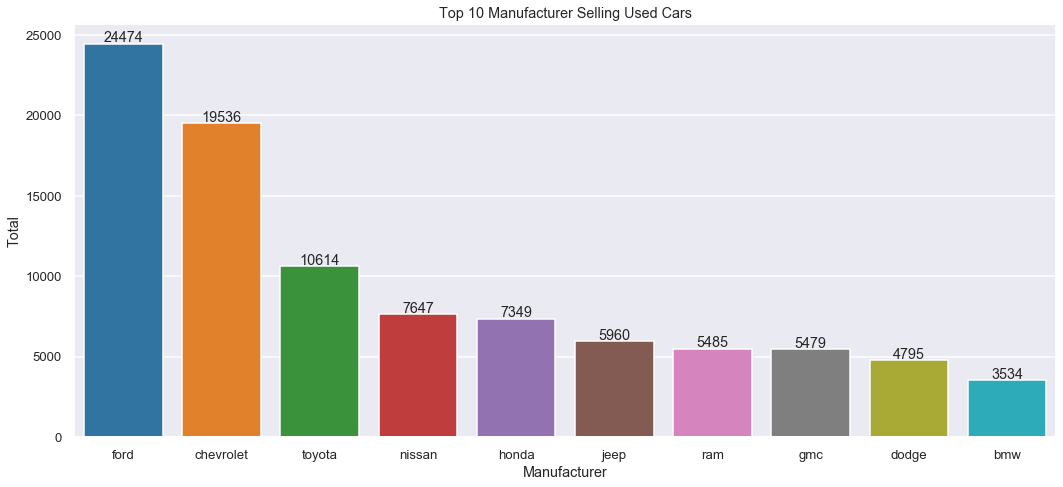

In [23]:
# Top 10 manufacturer that sell used cars
x = dfCars['manufacturer'].value_counts().nlargest(10).index
y = dfCars['manufacturer'].value_counts().nlargest(10).values
plt.figure(figsize=(15,7))
ax = sns.barplot(x=x, y=y)
for p in ax.patches:
    val = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            val+100,
            int(val),
            ha="center") 
plt.xlabel('Manufacturer')
plt.ylabel('Total')
plt.title('Top 10 Manufacturer Selling Used Cars')
plt.tight_layout()
plt.show()

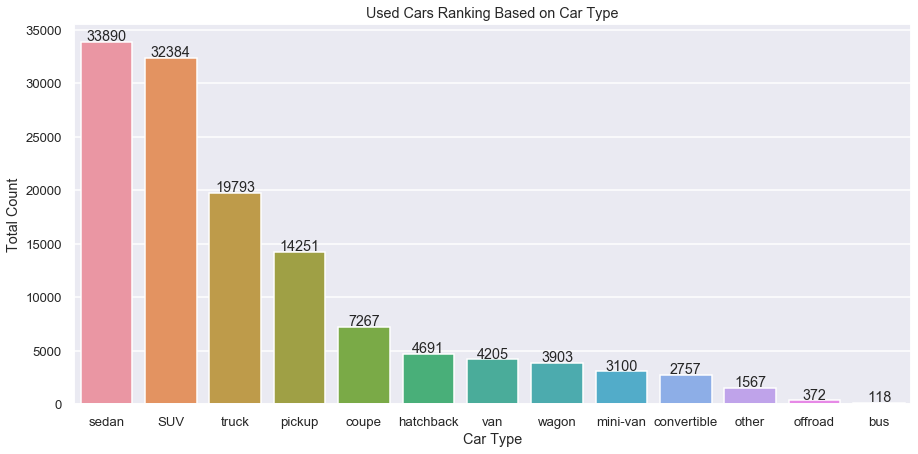

In [24]:
x = dfCars['type'].value_counts().index
y = dfCars['type'].value_counts().values
plt.figure(figsize=(15,7))
ax = sns.barplot(x=x, y=y)
for p in ax.patches:
    val = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            val+100,
            int(val),
            ha="center") 
plt.xlabel('Car Type')
plt.ylabel('Total Count')
plt.title('Used Cars Ranking Based on Car Type')
plt.show()

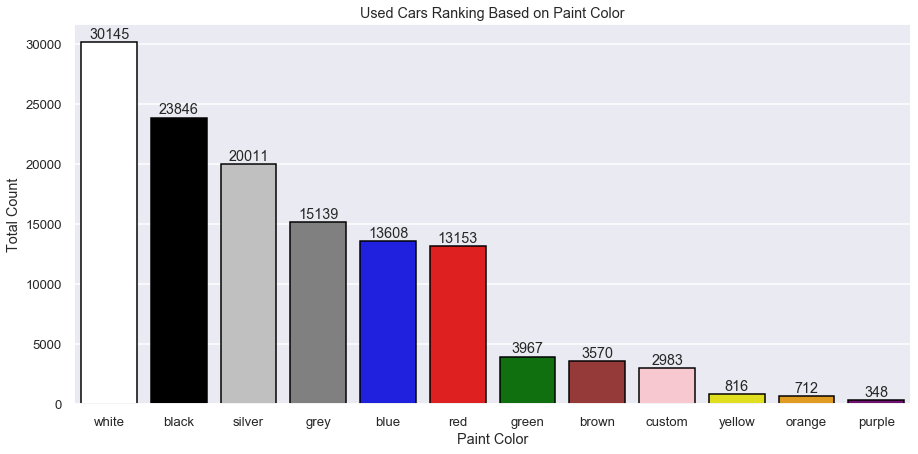

In [25]:
x = dfCars['paint_color'].value_counts().index
y = dfCars['paint_color'].value_counts().values
plt.figure(figsize=(15,7))
ax = sns.barplot(x=x, y=y, palette=['white','black','silver','grey','blue','red','green','brown','pink','yellow','orange','purple'], edgecolor='black')
for p in ax.patches:
    val = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            val+300,
            int(val),
            ha="center") 
plt.xlabel('Paint Color')
plt.ylabel('Total Count')
plt.title('Used Cars Ranking Based on Paint Color')
plt.show()

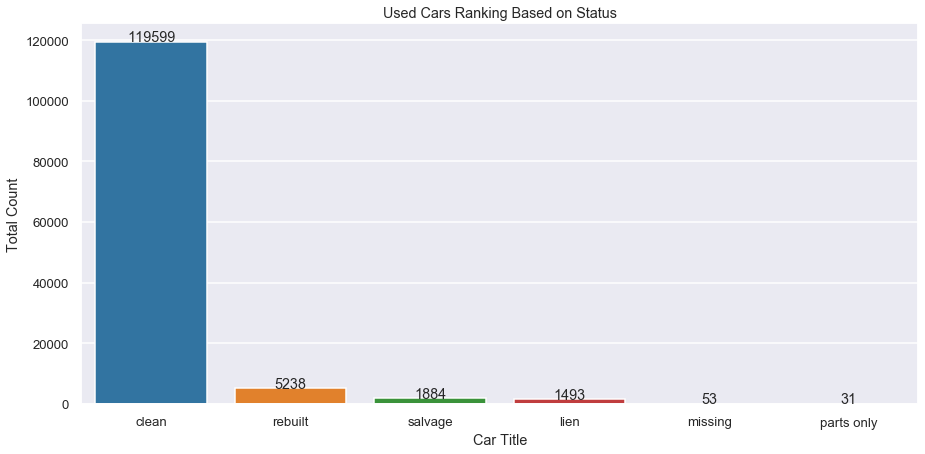

In [26]:
x = dfCars['title_status'].value_counts().index
y = dfCars['title_status'].value_counts().values
plt.figure(figsize=(15,7))
ax = sns.barplot(x=x, y=y)
for p in ax.patches:
    val = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            val+100,
            int(val),
            ha="center") 
plt.xlabel('Car Title')
plt.ylabel('Total Count')
plt.title('Used Cars Ranking Based on Status')
plt.show()

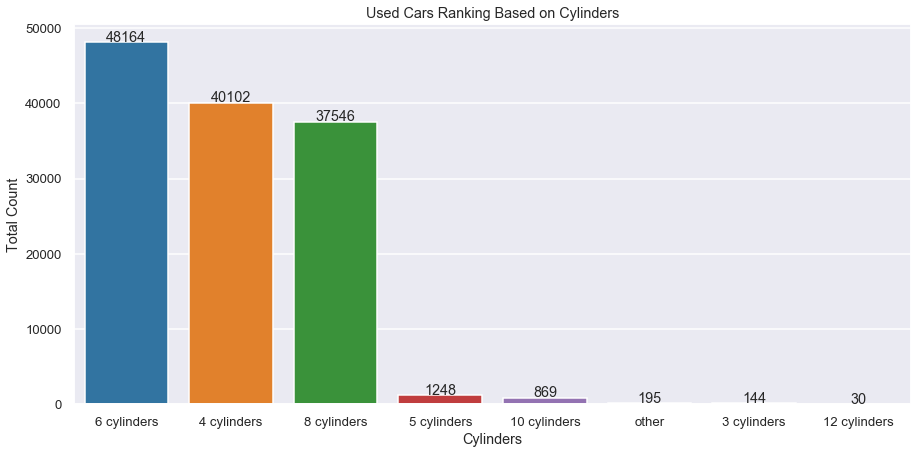

In [27]:
x = dfCars['cylinders'].value_counts().index
y = dfCars['cylinders'].value_counts().values
plt.figure(figsize=(15,7))
ax = sns.barplot(x=x, y=y)
for p in ax.patches:
    val = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            val+100,
            int(val),
            ha="center") 
plt.xlabel('Cylinders')
plt.ylabel('Total Count')
plt.title('Used Cars Ranking Based on Cylinders')
plt.show()

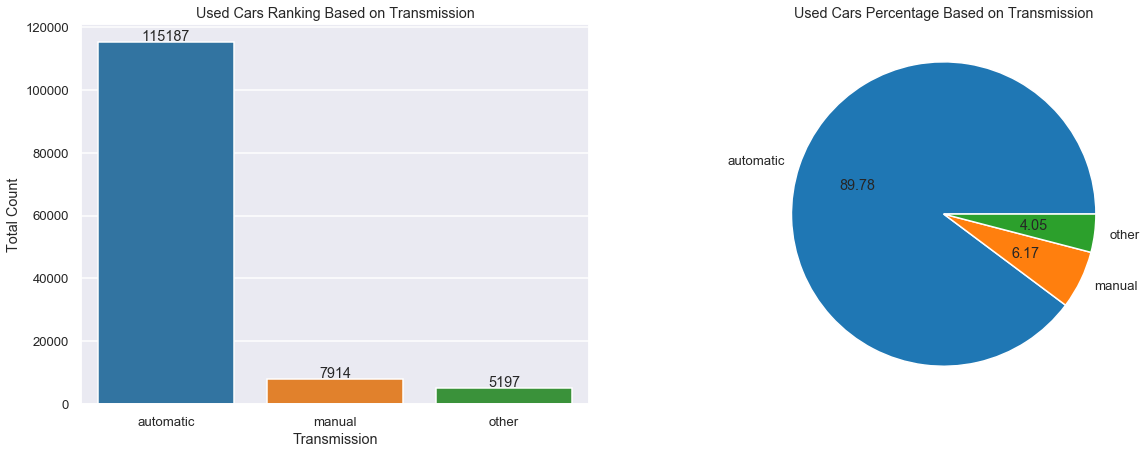

In [28]:
# Most transmission on used cars
x = dfCars['transmission'].value_counts().index
y = dfCars['transmission'].value_counts().values

fig, axis = plt.subplots(1,2,figsize=(20,7))

sns.barplot(x=x, y=y, ax=axis[0])
for p in axis[0].patches:
    val = p.get_height()
    axis[0].text(p.get_x()+p.get_width()/2.,
            val+500,
            int(val),
            ha="center") 
axis[0].set_xlabel('Transmission')
axis[0].set_ylabel('Total Count')
axis[0].set_title('Used Cars Ranking Based on Transmission')

y1 = dfCars['transmission'].value_counts().values / dfCars['transmission'].value_counts().sum()
axis[1].pie(x=y1, labels=x, autopct="%.2f")
axis[1].set_title('Used Cars Percentage Based on Transmission')
plt.show()

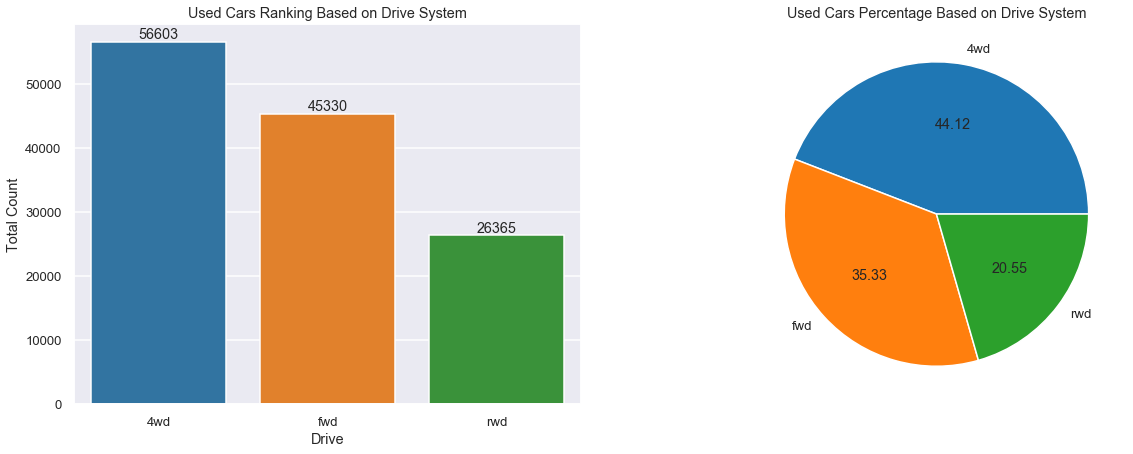

In [29]:
x = dfCars['drive'].value_counts().index
y = dfCars['drive'].value_counts().values

fig, axis = plt.subplots(1,2,figsize=(20,7))

sns.barplot(x=x, y=y, ax=axis[0])
for p in axis[0].patches:
    val = p.get_height()
    axis[0].text(p.get_x()+p.get_width()/2.,
            val+500,
            int(val),
            ha="center") 
axis[0].set_xlabel('Drive')
axis[0].set_ylabel('Total Count')
axis[0].set_title('Used Cars Ranking Based on Drive System')

y1 = dfCars['drive'].value_counts().values / dfCars['drive'].value_counts().sum()
axis[1].pie(x=y1, labels=x, autopct="%.2f")
axis[1].set_title('Used Cars Percentage Based on Drive System')
plt.show()

In [30]:
import folium as fo
from folium.plugins import HeatMap

In [31]:
truck = dfCars[dfCars['type'] == 'truck']
sedan = dfCars[dfCars['type'] == 'sedan']
suv = dfCars[dfCars['type'] == 'SUV']
coupe = dfCars[dfCars['type'] == 'coupe']
convert = dfCars[dfCars['type'] == 'convertible']
pickup = dfCars[dfCars['type'] == 'pickup']
offroad = dfCars[dfCars['type'] == 'offroad']
van = dfCars[dfCars['type'] == 'van']
other = dfCars[dfCars['type'] == 'other']
hatch = dfCars[dfCars['type'] == 'hatchback']
mini = dfCars[dfCars['type'] == 'mini-van']
wagon = dfCars[dfCars['type'] == 'wagon']
bus = dfCars[dfCars['type'] == 'bus']

heatTruck = [[row['lat'],row['long']] for index, row in truck.iterrows()]
heatSedan = [[row['lat'],row['long']] for index, row in sedan.iterrows()]
heatSuv = [[row['lat'],row['long']] for index, row in suv.iterrows()]
heatCoupe = [[row['lat'],row['long']] for index, row in coupe.iterrows()]
heatConv = [[row['lat'],row['long']] for index, row in convert.iterrows()]
heatPick = [[row['lat'],row['long']] for index, row in pickup.iterrows()]
heatOff = [[row['lat'],row['long']] for index, row in offroad.iterrows()]
heatVan = [[row['lat'],row['long']] for index, row in van.iterrows()]
heatOther = [[row['lat'],row['long']] for index, row in other.iterrows()]
heatHatch = [[row['lat'],row['long']] for index, row in hatch.iterrows()]
heatMini = [[row['lat'],row['long']] for index, row in mini.iterrows()]
heatWagon = [[row['lat'],row['long']] for index, row in wagon.iterrows()]
heatBus = [[row['lat'],row['long']] for index, row in bus.iterrows()]


In [32]:
carMap = fo.Map(location=[37.0902,-95.7129],
               zoom_start=4.5)

HeatMap(heatTruck).add_to(carMap)
carMap

In [33]:
carMap = fo.Map(location=[37.0902,-95.7129],
               zoom_start=4.5)

HeatMap(heatSedan).add_to(carMap)
carMap

In [34]:
carMap = fo.Map(location=[37.0902,-95.7129],
               zoom_start=4.85)

HeatMap(heatSuv).add_to(carMap)
carMap

In [35]:
carMap = fo.Map(location=[37.0902,-95.7129],
               zoom_start=4.85)

HeatMap(heatCoupe).add_to(carMap)
carMap

In [36]:
carMap = fo.Map(location=[37.0902,-95.7129],
               zoom_start=4.85)

HeatMap(heatConv).add_to(carMap)
carMap

In [37]:
carMap = fo.Map(location=[37.0902,-95.7129],
               zoom_start=4.85)

HeatMap(heatPick).add_to(carMap)
carMap

In [38]:
carMap = fo.Map(location=[37.0902,-95.7129],
               zoom_start=4.85)

HeatMap(heatOff).add_to(carMap)
carMap

In [39]:
carMap = fo.Map(location=[37.0902,-95.7129],
               zoom_start=4.85)

HeatMap(heatVan).add_to(carMap)
carMap

In [40]:
carMap = fo.Map(location=[37.0902,-95.7129],
               zoom_start=4.85)

HeatMap(heatOther).add_to(carMap)
carMap

In [41]:
carMap = fo.Map(location=[37.0902,-95.7129],
               zoom_start=4.85)

HeatMap(heatHatch).add_to(carMap)
carMap

In [42]:
carMap = fo.Map(location=[37.0902,-95.7129],
               zoom_start=4.85)

HeatMap(heatMini).add_to(carMap)
carMap

In [43]:
carMap = fo.Map(location=[37.0902,-95.7129],
               zoom_start=4.85)

HeatMap(heatWagon).add_to(carMap)
carMap

In [44]:
carMap = fo.Map(location=[37.0902,-95.7129],
               zoom_start=4.85)

HeatMap(heatBus).add_to(carMap)
carMap